In [1]:
import keras
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.regularizers import L1,L1L2,L2
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\91998\Downloads\Multiple CSV\Multiple CSV\6.overlap.csv",header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


<Axes: xlabel='0', ylabel='1'>

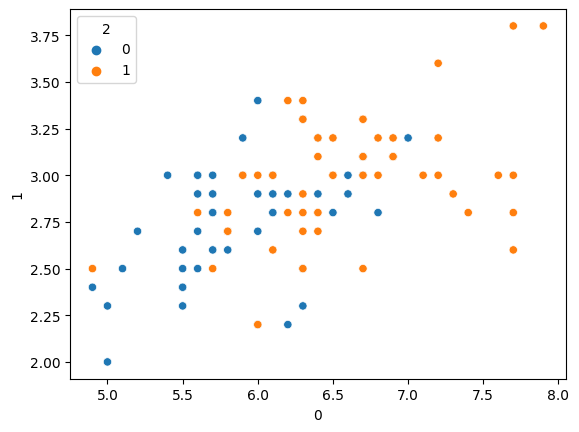

In [5]:
import seaborn as sns
sns.scatterplot(data=df,x=0,y=1,hue=2)

## Observation: As we see in the graph , both the data points are overlapping.

In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)

In [7]:
## Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [8]:
## Preprocessing train and test data
std=StandardScaler()
x_trainp=std.fit_transform(x_train)
x_testp=std.transform(x_test)

In [13]:
model=Sequential()
model.add(Dense(20,activation="relu",input_dim=2))
model.add(Dense(24,activation="relu"))
model.add(Dense(22,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model=Sequential()
model.add(Dense(30,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(32,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(26,activation="relu",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                90        
                                                                 
 dense_9 (Dense)             (None, 32)                992       
                                                                 
 dense_10 (Dense)            (None, 26)                858       
                                                                 
 dense_11 (Dense)            (None, 1)                 27        
                                                                 
Total params: 1967 (7.68 KB)
Trainable params: 1967 (7.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
## Training the model
model.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=0.1),metrics=["accuracy"])
history=model.fit(x_trainp,y_train,batch_size=5,epochs=20,validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 12ms/step - loss: 0.7419 - accuracy: 0.5926 - val_loss: 0.7411 - val_accuracy: 0.4444
Epoch 2/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.6667 - val_loss: 0.7419 - val_accuracy: 0.4444
Epoch 3/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6694 - accuracy: 0.7037 - val_loss: 0.7430 - val_accuracy: 0.4444
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.6503 - accuracy: 0.7531 - val_loss: 0.7177 - val_accuracy: 0.6667
Epoch 5/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6330 - accuracy: 0.7284 - val_loss: 0.7443 - val_accuracy: 0.6667
Epoch 6/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6234 - accuracy: 0.7160 - val_loss: 0.7807 - val_accuracy: 0.4444
Epoch 7/20
17/17 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.7284 - val_loss: 0.7545 - val_accuracy: 0.6667
Epoch 8/20
17/17 [=

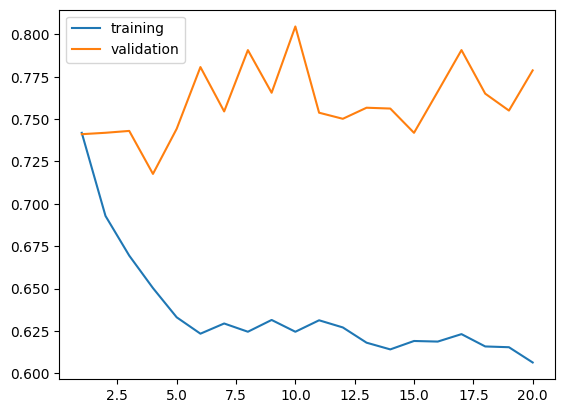

In [24]:
plt.plot(range(1,21),history.history["loss"],label="training")
plt.plot(range(1,21),history.history["val_loss"],label="validation")
plt.legend()

9600/9600 [==============================] - 7s 693us/step


<Axes: >

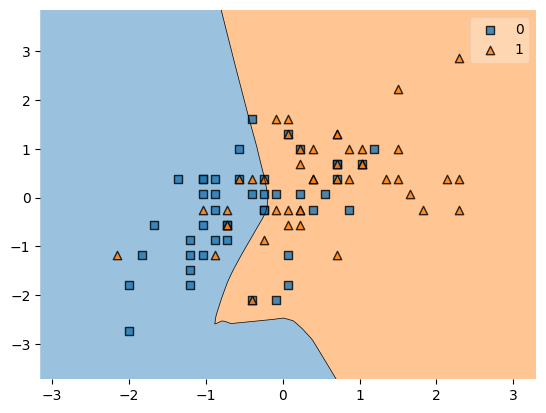

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_trainp,y_train.values,clf=model)

9600/9600 [==============================] - 7s 738us/step


<Axes: >

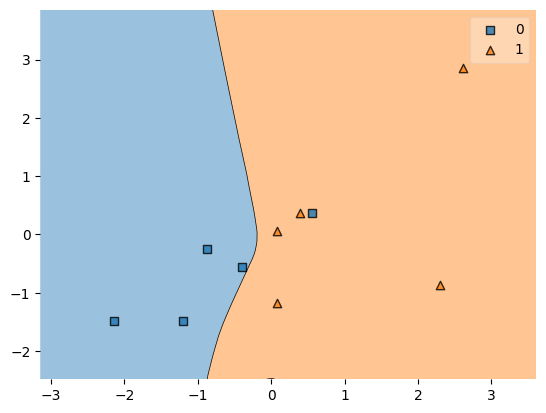

In [26]:
plot_decision_regions(x_testp,y_test.values,clf=model)